In [5]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import corner
import warnings
warnings.filterwarnings('ignore')

## generate is_lens to if a galaxy in sample is a lense

In [15]:

with h5py.File('../data/potential_lense_ELCOSMOS.h5', 'r+') as galaxies:
    is_lens = np.zeros(len(galaxies)-1)
    for i in range(len(galaxies)-1):
        id = str(i)
        image_file = f'../data/find_image_ELCOSMOS/{id}_point.dat'
        lines = np.atleast_2d(np.genfromtxt(image_file))
        length = lines.shape[0]
        if length == 1:
            continue
        # print(f'{i} galaxies:', sep=' ')
        ind = 0
        while ind < length:
            num_image = int(lines[ind,0])
            # print(f'{num_image} images:', sep=' ')
            if num_image > 1:
                is_lens[i] = 1
                break
            ind += num_image + 1
    # galaxies.create_dataset('is_lens', data=is_lens)
    del galaxies['is_lens']
    galaxies.create_dataset('is_lens', data=is_lens)
    # galaxies['is_lens'][()] = is_lens


In [16]:
np.sum(is_lens)

436.0

## test if is homogeneous

In [13]:
with h5py.File('../data/potential_lense_ELCOSMOS.h5', 'r') as galaxies:
    # r_circle_ar = np.zeros(len(galaxies)-1)
    x_array = np.array([])
    y_array = np.array([])
    for i in range(len(galaxies)-1):
        id = str(i)
        sample = galaxies[id]
        r_circle = sample.attrs['r_circle']
        num_bg = sample.attrs['num_bg']
        for j in range(num_bg):
            x = sample['x_background'][j]
            y = sample['y_background'][j]
            x = x/r_circle
            y = y/r_circle
            x_array = np.append(x_array, x)
            y_array = np.append(y_array, y)

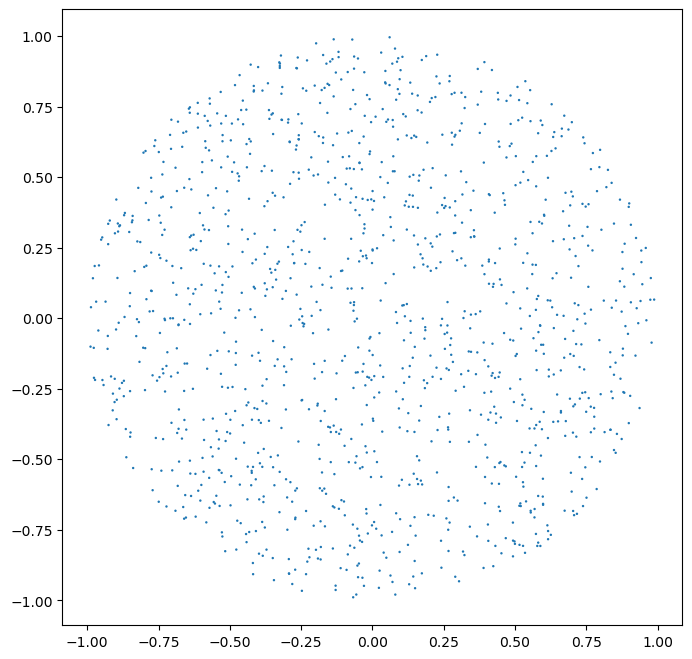

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(x_array, y_array, s=3,edgecolors='none')

## Read sample and store real lens

In [17]:
# with h5py.File('../data/potential_lense_ELCOSMOS.h5', 'r') as galaxies:
#     length = len(galaxies)-1
#     with h5py.File('../data/real_lense_ELCOSMOS.h5', 'w') as lense:
#         is_lens = galaxies['is_lens'][()]
#         id_lens = 0
#         for i in range(length):
#             if is_lens[i] == 0:
#                 continue
#             id = str(i)
#             sample = galaxies[id]
#             l_sample = lense.create_group(str(id_lens))
#             l_sample.attrs['potential_id'] = id
#             l_sample.attrs['alpha_sps'] = sample.attrs['alpha_sps']
#             l_sample.attrs['gamma_DM'] = sample.attrs['gamma_DM']
#             l_sample.attrs['logMh'] = sample.attrs['logMh']
#             l_sample.attrs['logMstar'] = sample.attrs['logMstar']
#             l_sample.attrs['logRe'] = sample.attrs['logRe']
#             l_sample.attrs['logc'] = sample.attrs['logc']
#             l_sample.attrs['num_bg'] = sample.attrs['num_bg']
#             l_sample.attrs['q'] = sample.attrs['q']
#             l_sample.attrs['r_ein'] = sample.attrs['r_ein']
#             l_sample.attrs['rhos'] = sample.attrs['rhos']
#             l_sample.attrs['rs_arcsec'] = sample.attrs['rs']
#             l_sample.attrs['z_foreground'] = sample.attrs['z_foreground']
#             l_sample.attrs['L_background'] = sample['L_background'][()]
#             l_sample.attrs['z_background'] = sample['z_background'][()]
#             l_sample.attrs['x_background'] = sample['x_background'][()]
#             l_sample.attrs['y_background'] = sample['y_background'][()]

#             image_file = f'../data/find_image_ELCOSMOS/{id}_point.dat'
#             images_data = np.atleast_2d(np.genfromtxt(image_file))
#             l_sample.attrs['image_data'] = images_data

#             id_lens += 1


In [18]:
with h5py.File('../data/real_lense_ELCOSMOS.h5', 'r') as lense:
    length = len(lense)
    r_ein = np.zeros(length)
    logMstar = np.zeros(length)
    logRe = np.zeros(length)
    logMh = np.zeros(length)
    logc = np.zeros(length)
    q = np.zeros(length)
    gamma_DM = np.zeros(length)
    z_foreground = np.zeros(length)
    for i in range(length):
        sample = lense[str(i)]
        r_ein[i] = sample.attrs['r_ein']    
        logMstar[i] = sample.attrs['logMstar']
        logRe[i] = sample.attrs['logRe']
        logMh[i] = sample.attrs['logMh']
        logc[i] = sample.attrs['logc']
        q[i] = sample.attrs['q']
        gamma_DM[i] = sample.attrs['gamma_DM']
        z_foreground[i] = sample.attrs['z_foreground']

In [19]:
#* parent lenses
with h5py.File('../data/foreground_sample.h5', 'r') as file:
    logMstar_p = np.array(file['logMstar'])
    logMh_p = np.array(file['logMh'])
    logRe_p = np.array(file['logRe'])
    q_p = np.array(file['q'])
    z_p = np.array(file['z'])
    gamma_DM_p = np.array(file['gamma_DM'])
    c_p = np.array(file['c'])
    r_ein_arcsec_p = np.array(file['r_ein_arcsec'])

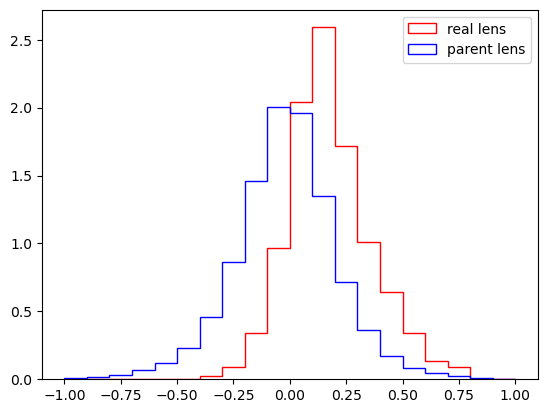

In [20]:
plt.hist(np.log10(r_ein), bins=20, histtype='step', color='r', label='real lens',range = (-1,1),density=True)
plt.hist(np.log10(r_ein_arcsec_p), bins=20, histtype='step', color='b', label='parent lens',range = (-1,1),density=True)
plt.legend()

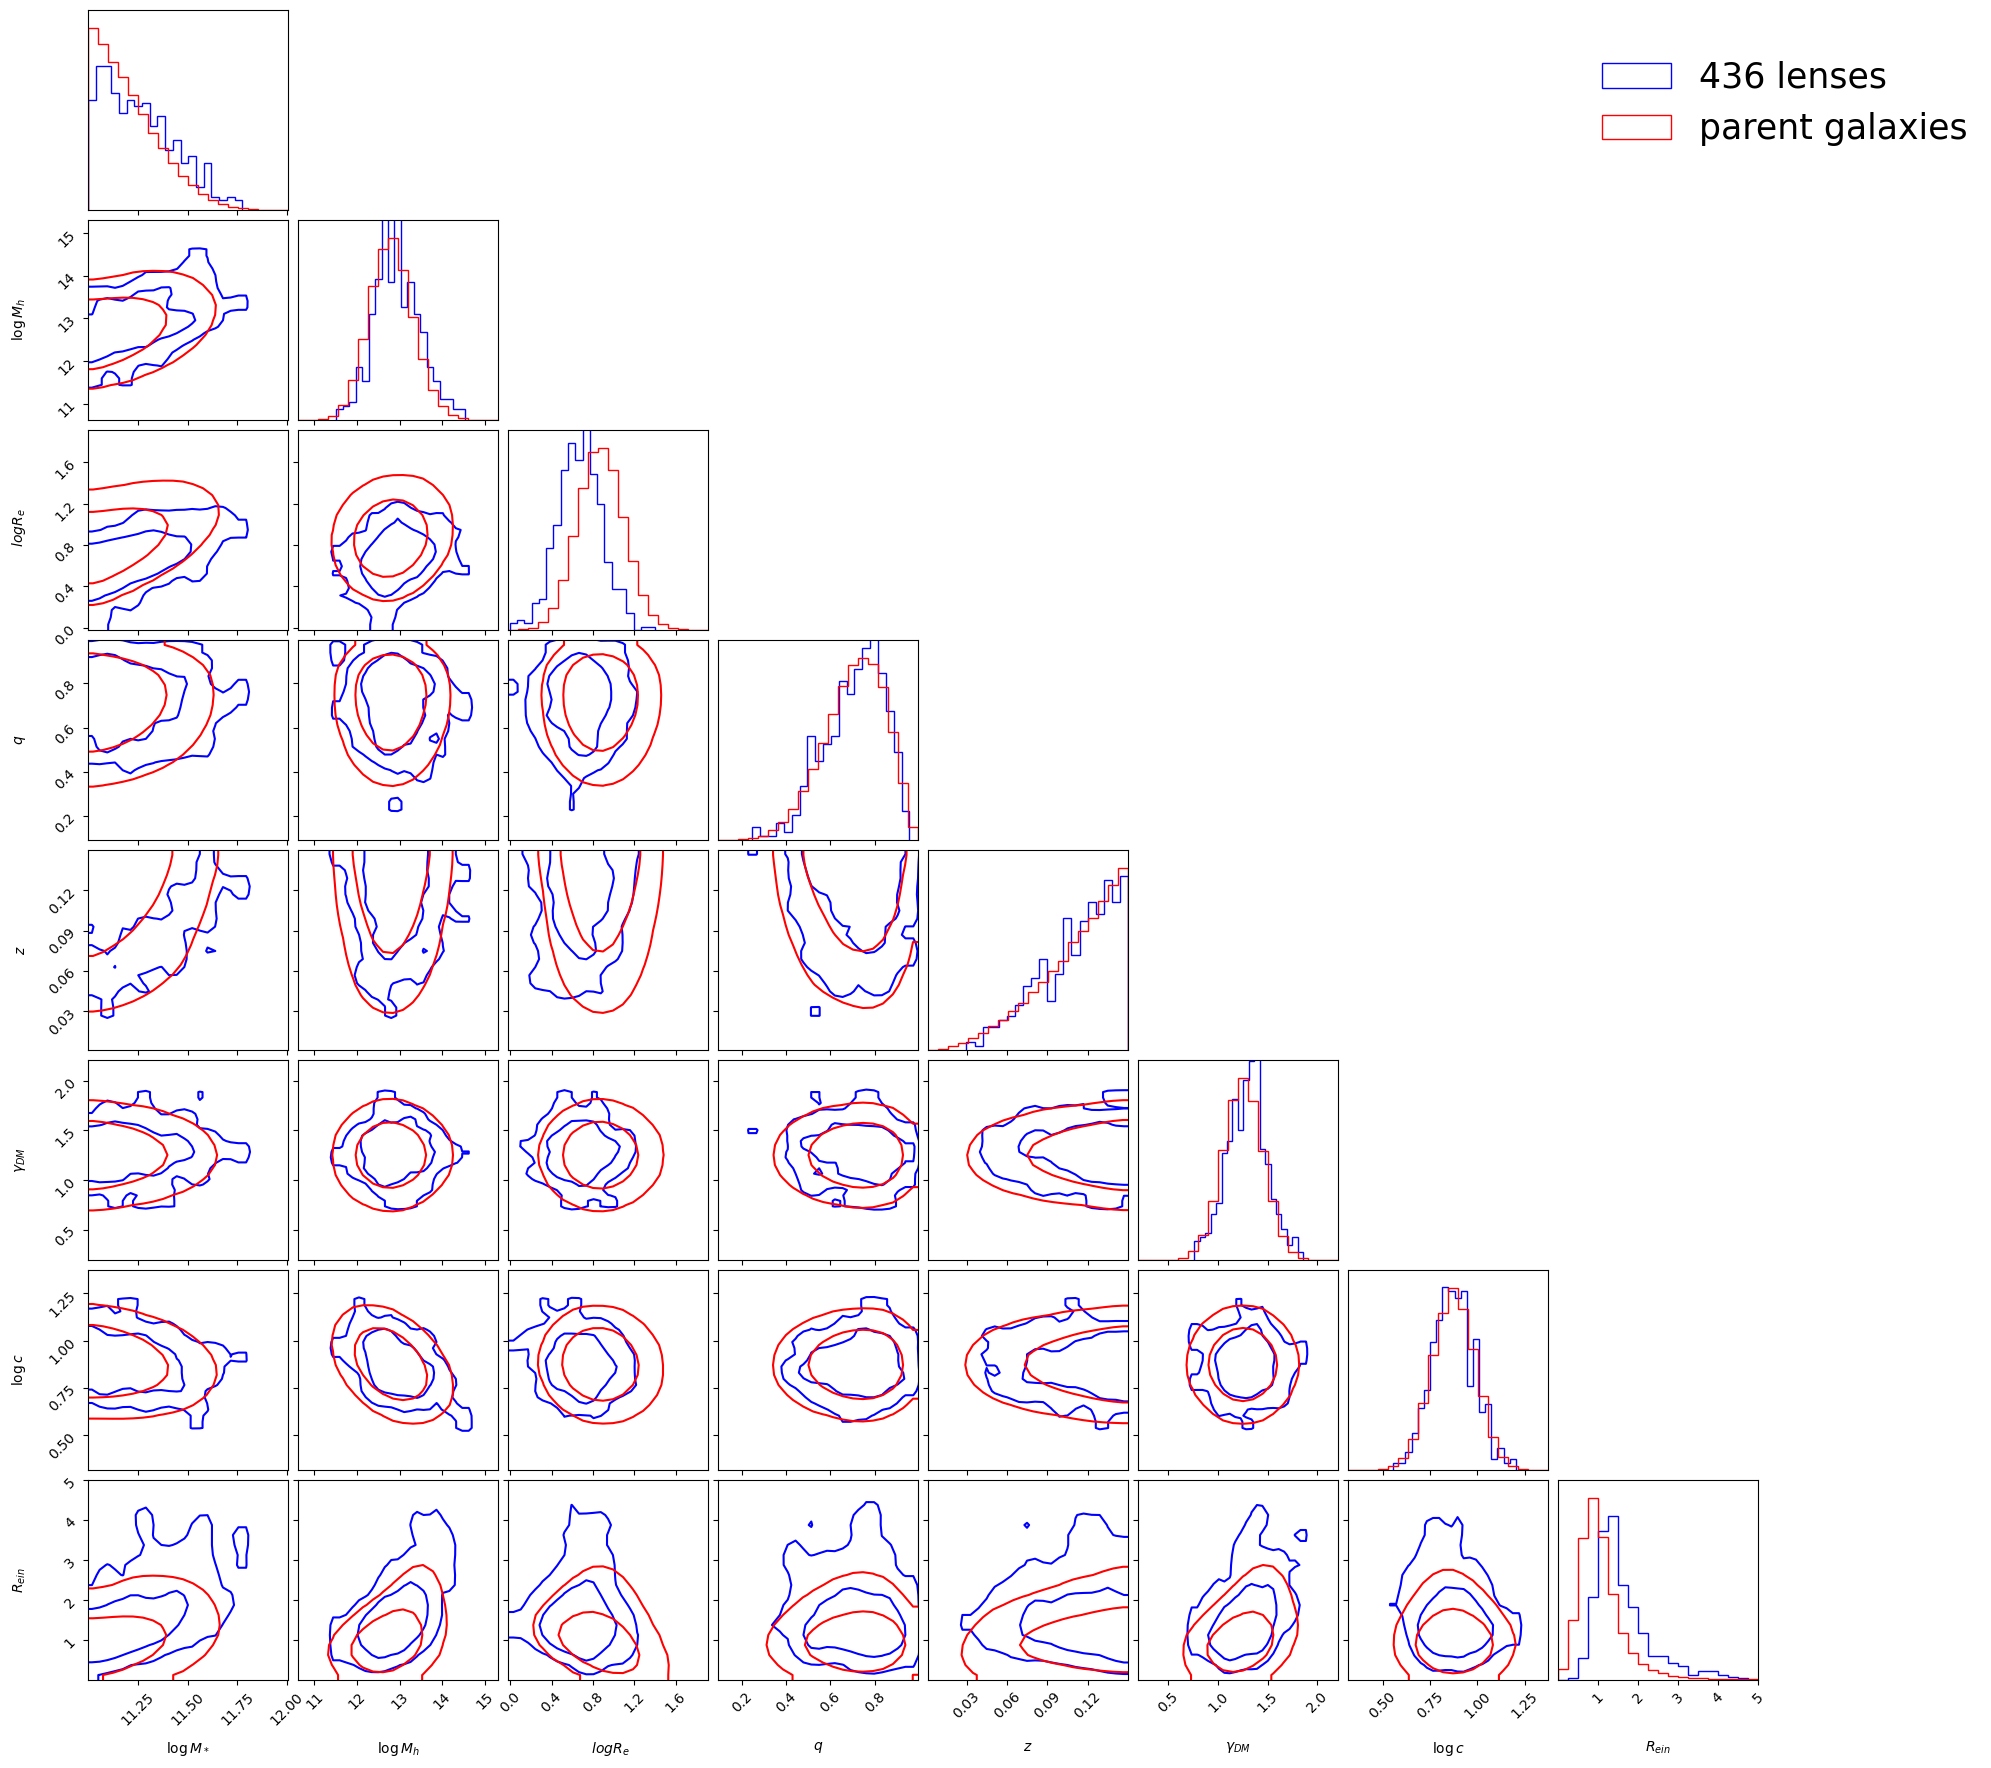

In [21]:
figure = corner.corner(np.array([logMstar,logMh,logRe,q,z_foreground,gamma_DM,logc,r_ein]).T,labels=[r'$\log M_*$',r'$\log M_h$',r'$\ log R_e$',r'$q$',r'$z$',r'$\gamma_{DM}$',r'$\log c$',r'$R_{ein}$'],  plot_datapoints=False, plot_density = 0,levels = (0.68,0.95), hist_kwargs={'density':True, 'label':f'{len(logMstar)} lenses'}, dpi = 1000, color = 'b', range = [1.,1.,1.,1.,1.,1.,1.,(0,5)], smooth = 1.0)
corner.corner(np.array([logMstar_p,logMh_p,logRe_p,q_p,z_p,gamma_DM_p,c_p,r_ein_arcsec_p]).T,labels=[r'$\log M_*$',r'$\log M_h$',r'$\ log R_e$',r'$q$',r'$z$',r'$\gamma_{DM}$',r'$\log c$',r'$R_{ein}$'], plot_datapoints=False, plot_density = 0,levels = (0.68,0.95),hist_kwargs={'density':True, 'label':'parent galaxies' }, dpi = 1000, color = 'r', fig = figure, range = [1.,1.,1.,1.,1.,1.,1.,(0,5)],smooth=1.0)

# ax = np.array(figure.get_axes()).reshape(8,8)

plt.legend(frameon = 0, loc=(0.15,7.6), fontsize = 25)
plt.show()

In [1]:
a = [3,2.1544,-0.0229,1.2414,0.0235,-0.9321,-1.1932,104.067,-0.0505,3.4439,2.1401,0,0.0015,-0.0653,0.0108,108.117]

In [7]:
np.array(a[4:]).reshape(3,4)

array([[ 2.35000e-02, -9.32100e-01, -1.19320e+00,  1.04067e+02],
       [-5.05000e-02,  3.44390e+00,  2.14010e+00,  0.00000e+00],
       [ 1.50000e-03, -6.53000e-02,  1.08000e-02,  1.08117e+02]])